# Importing Packages & Set Up Data Layout

## Preprocessing Information for the Given Data.

A high-pass filter with a 30 Hz cut-off frequency and a power line notch filter (50 Hz) were used. All recordings are artifact-free EEG segments of 60 seconds duration. At the stage of data preprocessing, the Independent Component Analysis (ICA) was used to eliminate the artifacts (eyes, muscle, and cardiac overlapping of the cardiac pulsation). The arithmetic task was the serial subtraction of two numbers. Each trial started with the communication orally 4-digit (minuend) and 2-digit (subtrahend) numbers (e.g. 3141 and 42).

In [ ]:
# Let's load some packages we need (pip install mne)
import mne
import mne.viz
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.channels import make_standard_montage
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# ! pip install mne

# Read raw data files where each file contains a run
files = ['../datasets/HW2Datasets/Subject06_1.edf', '../datasets/HW2Datasets/Subject06_2.edf', '../datasets/HW2Datasets/Subject07_1.edf', '../datasets/HW2Datasets/Subject07_2.edf']

# Read the raw EDF files into an array
raws = [read_raw_edf(f, preload=True) for f in files]

# Loop through the array and make the following changes to the raw files
for raw in raws:

    # Rename the raw channels
    raw.rename_channels({'EEG F3':'F3', 'EEG F4':'F4',
                            'EEG Fp1':'Fp1', 'EEG Fp2':'Fp2', 'EEG F7':'F7', 'EEG F8':'F8',
                            'EEG T3':'T3', 'EEG T4':'T4', 'EEG C3':'C3', 'EEG C4':'C4',
                            'EEG T5':'T5', 'EEG T6':'T6', 'EEG P3':'P3', 'EEG P4':'P4',
                            'EEG O1':'O1', 'EEG O2':'O2', 'EEG Fz':'Fz', 'EEG Cz':'Cz',
                            'EEG Pz':'Pz', 'EEG A2-A1':'A2', 'ECG ECG':'ECG'})


    # Set channel types
    raw.set_channel_types({'ECG':'ecg'})

    # Define the channel locations
    raw.set_montage(mne.channels.make_standard_montage('standard_1020'))

    # Print Raw Channel Names for double checking
    print(raw.ch_names)

# Rename the raws with more insightfull names
subject6_background = raws[0] # Subject 6 background raw
subject6_task = raws[1] # Subject 6 task raw
subject7_background = raws[2] # Subject 7 background raw
subject7_task = raws[3] # Subject 7 task raw

Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject06_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject06_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject07_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject07_2.edf...
EDF file de

# Q2)
## Plot the spectrogram for the two conditions (background and task). Discuss the main differences between the two groups.
There are 21 channels of which there are 4 different files to observe. So what I am going to do is pick 5 channels from different sections of the brain near the center (Fp1, Fz, Cz, Pz, & O1) to analyze given the 4 different files (subject 6 background, subject 6 task, subject 7 background, subject 7 task). This will reduce the number of plots analyzed from 84 to 20 without lossing to much insight.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


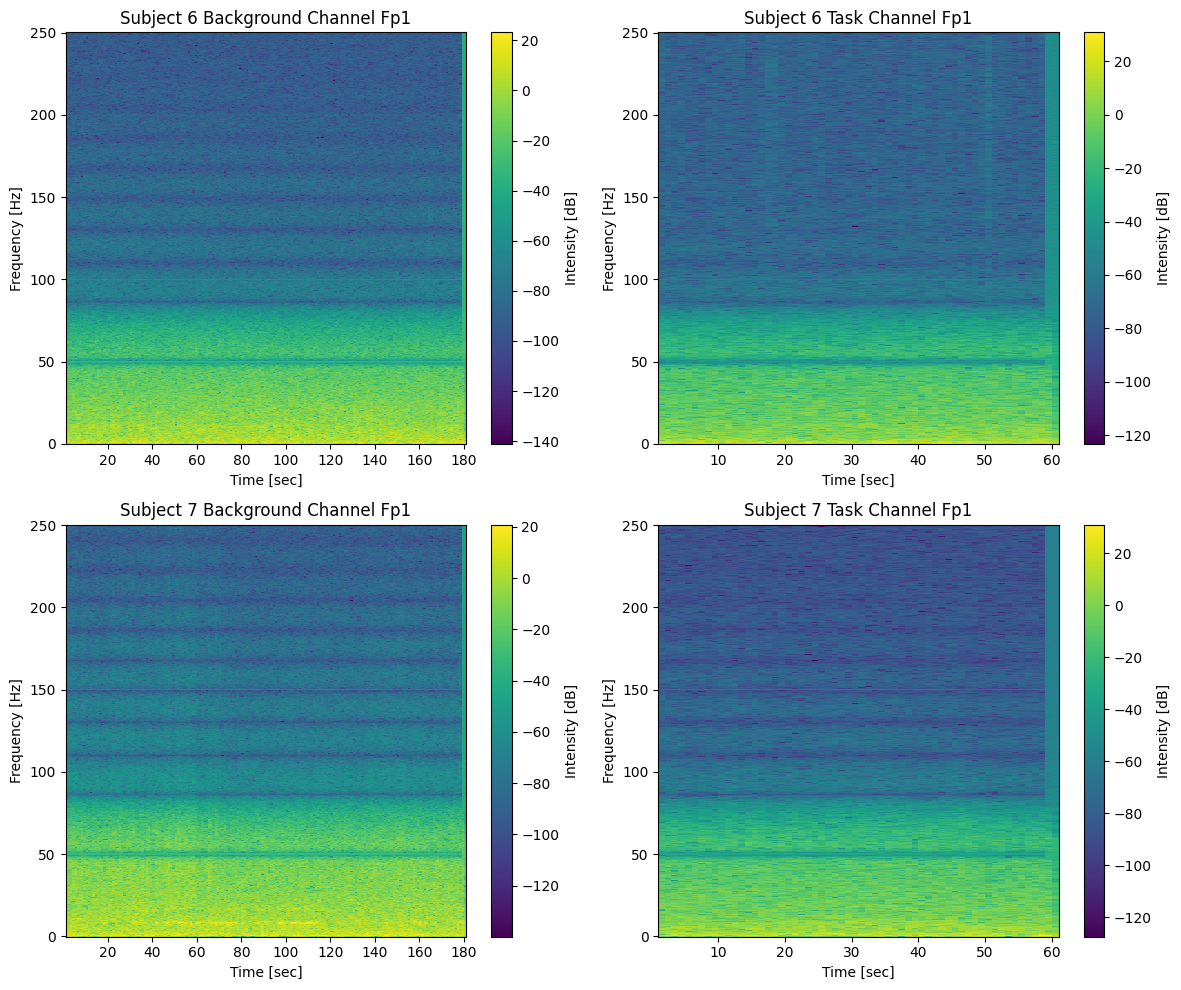

In [ ]:
def plot_spectrogram(raws, channel_name):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10)) # create subplot for easier viewing
    # Loop through the various raw files and a nested loop for easier subploting
    for r in range(2):
        for c in range(2):
            raw = raws[2*r+c] # get the correct raw file
            raw_copy = raw.copy() # avoid deletion of other channels through copying raw
            raw_copy.pick_channels([channel_name]) # pick the given channel
            eeg_data = raw_copy.get_data()[0]  # Shape is (n_channels, n_times)
            sfreq = raw_copy.info['sfreq']  # Sampling frequency

            # Compute spectrogram for the first channel (e.g., Fz)
            f, t, Sxx = sp.signal.spectrogram(eeg_data, fs=sfreq, window=('hann'),
                                            nperseg=1500, noverlap=1000, scaling='density', mode='psd')

            # Plot the spectrogram
            pcm = axs[r, c].pcolormesh(t, f, 10*np.log10(Sxx*1e6**2), cmap='viridis')
            axs[r, c].set_ylabel('Frequency [Hz]') # add clear y-label
            axs[r, c].set_xlabel('Time [sec]') # add clear x-label

            # Choose the title based on the given raw files content
            title = ''
            if 2*r+c == 0:
                title = 'Subject 6 Background'
            if 2*r+c == 1:
                title = 'Subject 6 Task'
            if 2*r+c == 2:
                title = 'Subject 7 Background'
            if 2*r+c == 3:
                title = 'Subject 7 Task'

            axs[r, c].set_title(f'{title} Channel {channel_name}') # title the plot
            plt.colorbar(pcm).set_label('Intensity [dB]') # add clear label to the colorbar

        
    plt.tight_layout() # add correct distancing between subplots
    plt.show() # show plot

plot_spectrogram(raws, 'Fp1') # Plot the Spectrogram for all raw files in the channel Fp1

This plot shows channel Fp1 over all the raw files and we can clearly see that Subject 7 background has the most intensity in the lower frequencies out of all the other plots. Also the streaks of high intensity are prominent in subject 7 background over long stretches at around 15hz or so in comparision to the other subplots.

However, something which is also interesting here is that when we compare the 2 task subplots, we can see that subject 6 has more activation in the bottom most frequencies (around 1hz). But subject 7 has more activation distributed between that 1hz-8hz region. Overall though, I would say that subject 6 has more intesity throughout the task in comparision to subject 7.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


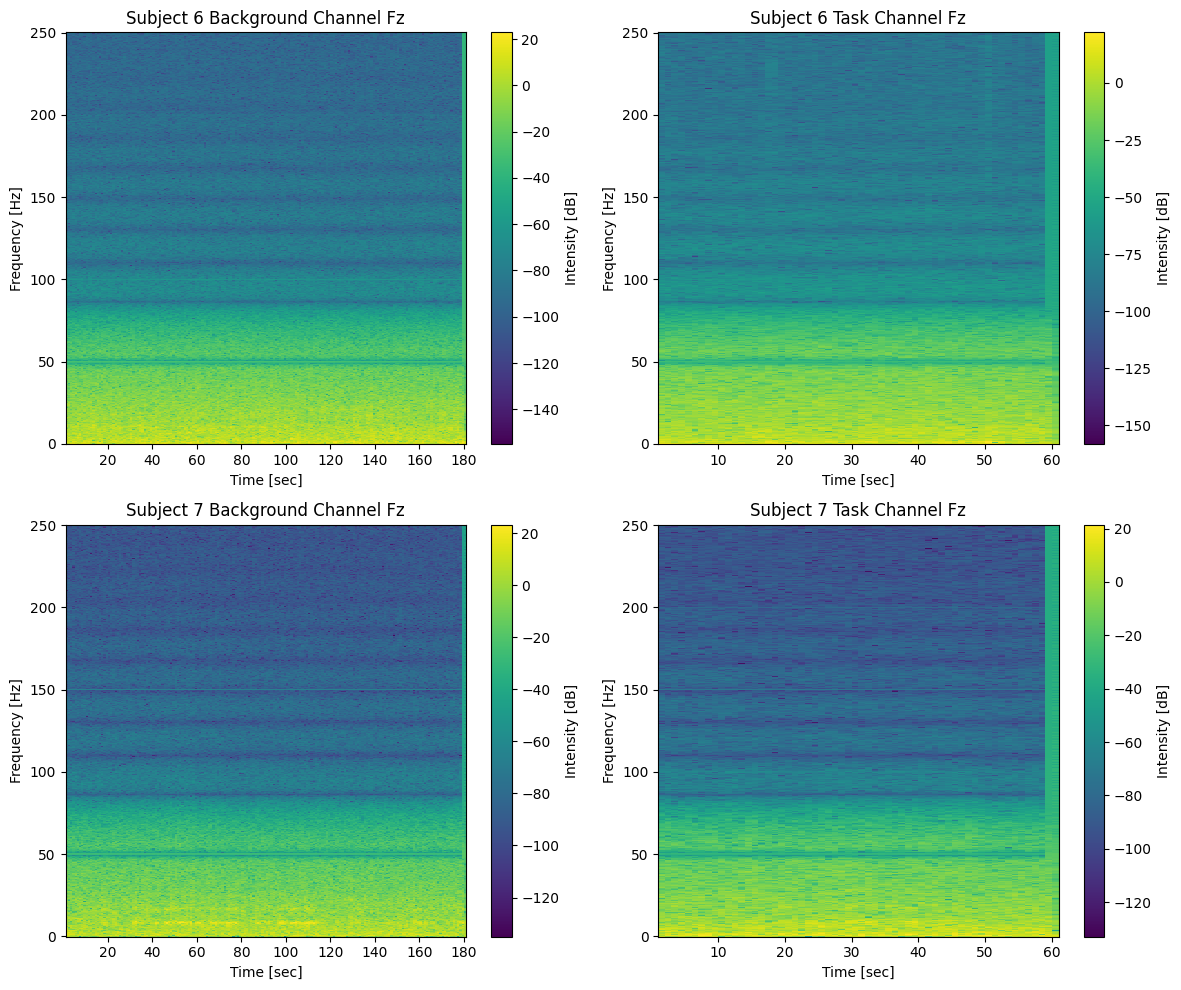

In [ ]:
plot_spectrogram(raws, 'Fz') # Plot the Spectrogram for all raw files in the channel Fz

The plot shows channel Fz and we can see that subject 6's intensity in this region is immense in comparison to subject 7. Even in the background plot there is alot of intensity showing from this channel, but when comparing both of their task subplots, this trend still continues. Even though the intensity colorbar for subject 6 task doesn't cap at 20, we could assume it's near 20 and overall the subplot there is just way brighter that subject 7 task.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


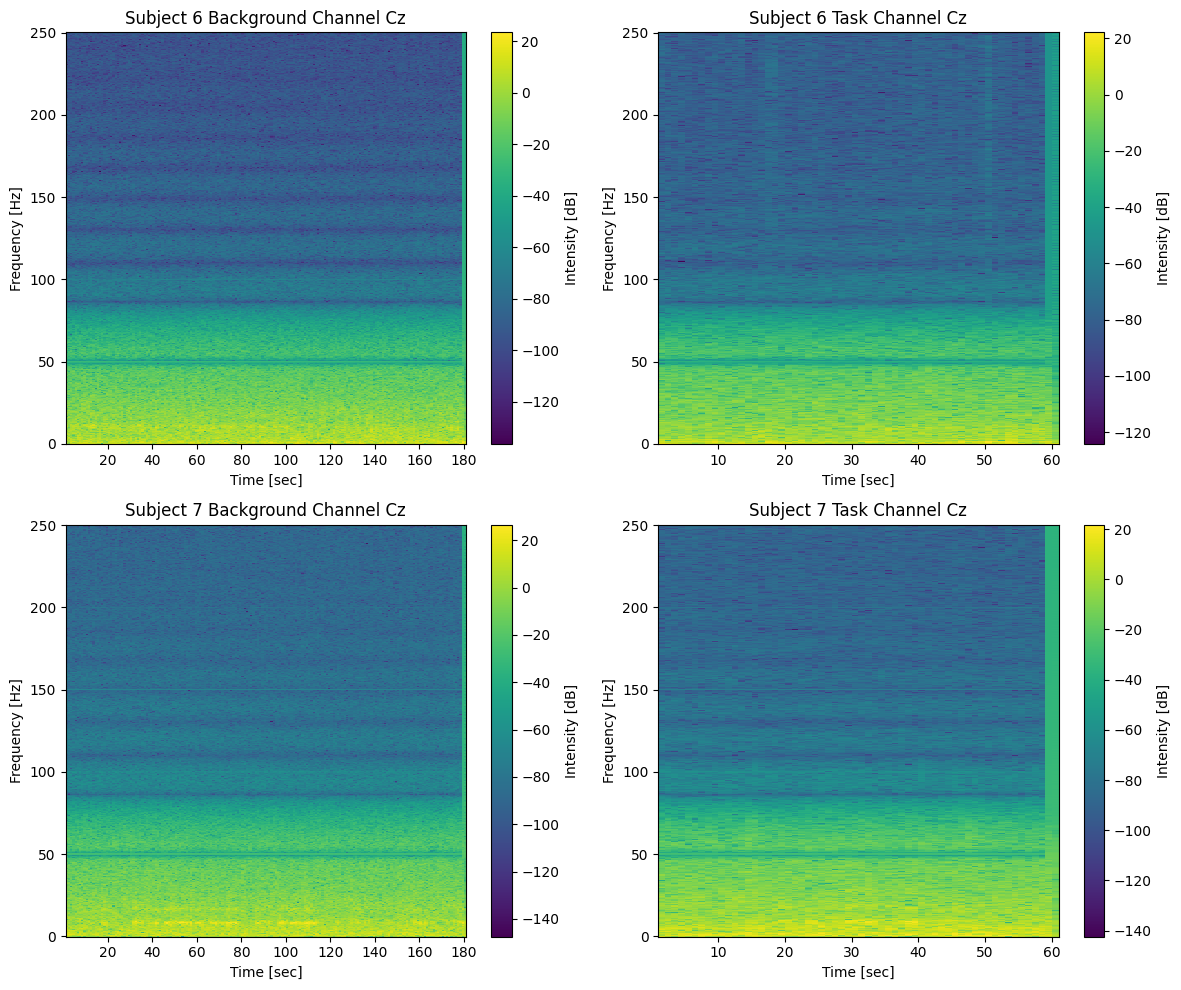

In [ ]:
plot_spectrogram(raws, 'Cz') # Plot the Spectrogram for all raw files in the channel Cz

The plot is of channel Cz and the backgrounds are very similar to the previous backgrounds for the other channels. However the Task channel is different in the fact that now there is more intensity going on at this channel for subject 7  in all frequency ranges in comparision to subject 6.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


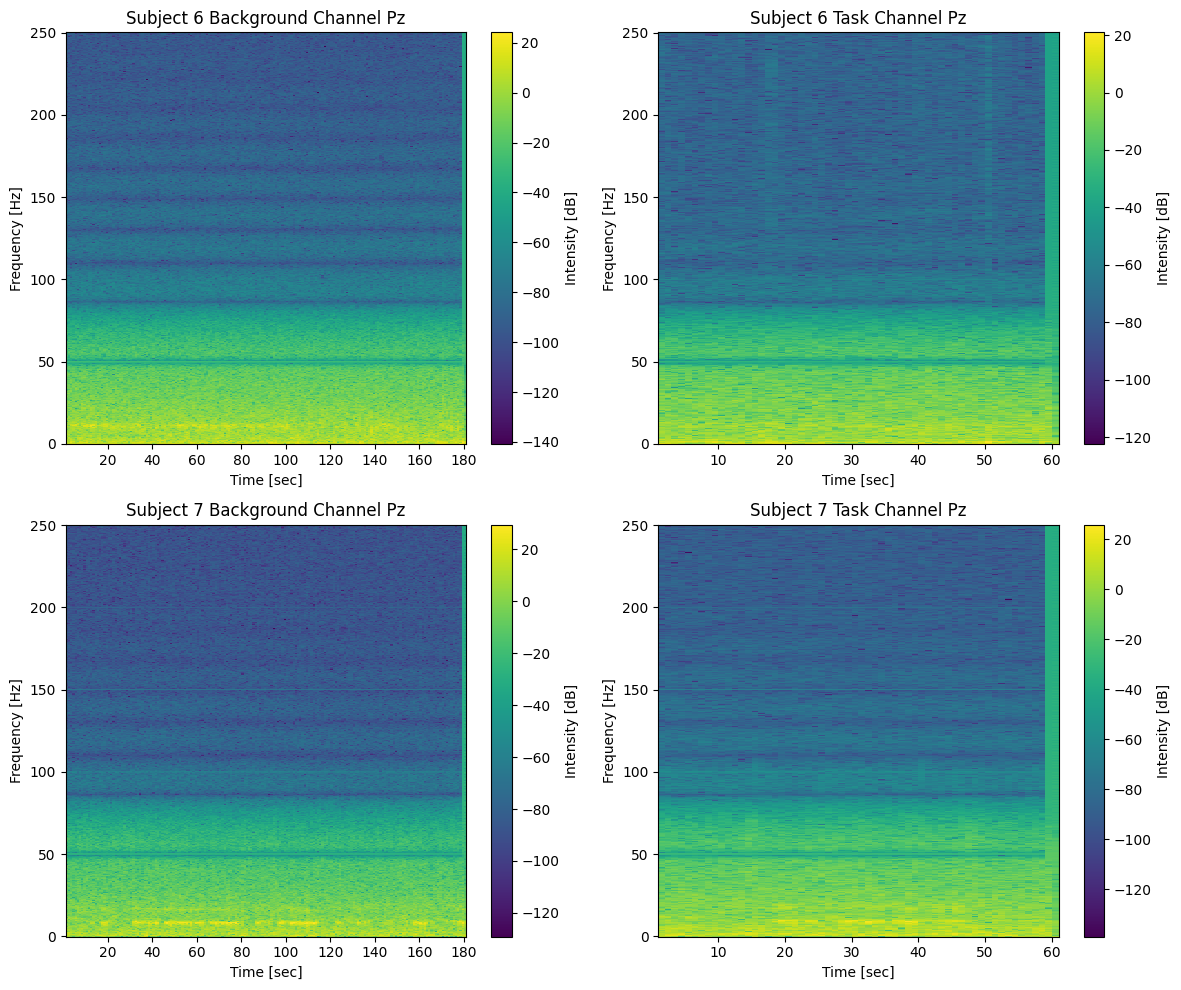

In [ ]:
plot_spectrogram(raws, 'Pz') # Plot the Spectrogram for all raw files in the channel Pz

The plot is on over channel Pz and background is mostly the same as before, the main difference being that there is a clear intensity streak (lasts for many seconds) at around 12hz for both subject 6 and subject 7. Looking at the task subpots, subject 7 has an increased activity from around 1-12hz or so and subject 6 has the higher intesity in the upper frequency ranges.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


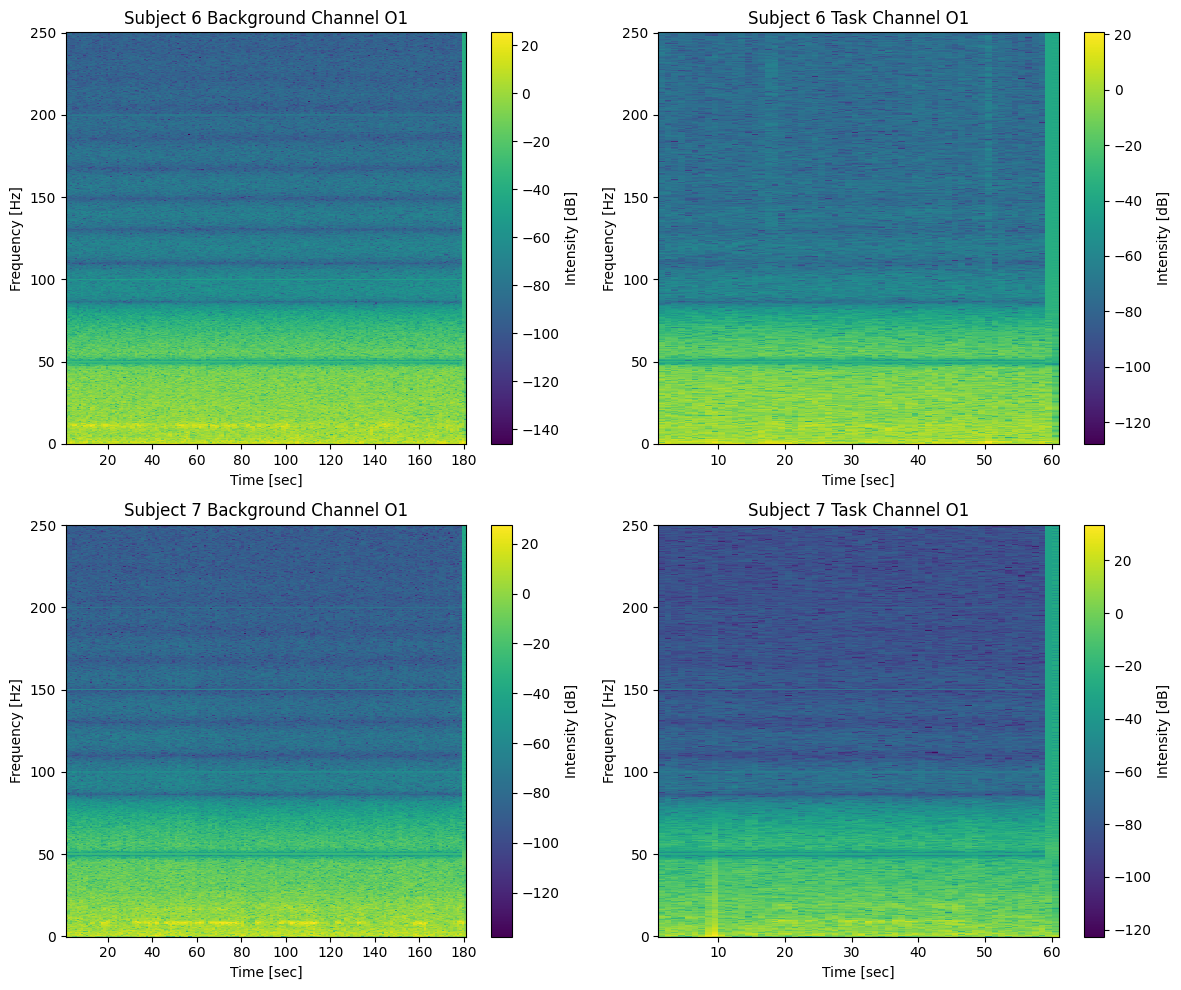

In [ ]:
plot_spectrogram(raws, 'O1') # Plot the Spectrogram for all raw files in the channel O1

The plot is over the O1 channel and the background is similar to the Pz background plots there. A clear thing which stuck out to me however was a bright streak in intesity through all frequency ranges at 10 seconds on subject 7 task. I don't know if subject 7 saw something crazy (sight because this is the occipital lobe), but the event definitly stands as an outlier here. For the task subplots though, I think that subject 6 was brighter on average in comparision to subject 7 outside of that event near 10 seconds.

### Overall Thoughts and Conclusions

During the task portion of the study it seems like subject 7 had more intense lower frequencys on averge in all regions of the brain in comparision to subject 6, however subject 6 had alot of intense activation for higher frequencies in most parts of the brain except for channel Cz, where subject 7 had overall more intensity there. Channel Cz is near the Motor Cortex and that section of the brain is responsible for motor functions. We could therefore conclude baised on this along with the information from the subject info that subject 7 was more confortable with the material, hence a lower intesity of high frequencies in comparision to subject 6. Also that subject 7 was mostly focused on writing the answers down in comparision to subject 6 who seemed to be more focused on thinking through the math problems (because subject 6 was probably not as comfortable with math like subject 7).